<a href="https://colab.research.google.com/github/abel-keya/Project-Analyze-A-B-Test-Results/blob/master/Analyze_ab_test_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
#import matplotlib.pyplot as plt
#%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
df.tail()

,user_id,timestamp,group,landing_page,converted
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0
294477,715931,2017-01-16 12:40:24.467417,treatment,new_page,0


In [4]:
df.columns

Index(['user_id', 'timestamp', 'group', 'landing_page', 'converted'], dtype='object')

In [5]:
df.count()

user_id         294478
timestamp       294478
group           294478
landing_page    294478
converted       294478
dtype: int64

b. Use the below cell to find the number of rows in the dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [7]:
df['user_id'].nunique() 

290584

d. The proportion of users converted.

In [8]:
(len(df[df['converted']==1]),df.shape[0])

(35237, 294478)

e. The number of times the `new_page` and `treatment` don't line up.

In [9]:
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]

3893

f. Do any of the rows have missing values?

In [10]:
df.isna().any().sum()

0

There is no  missing values in the rows

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [11]:
df.drop(df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].index, axis=0, inplace=True)

In [12]:
#confirming the dropped rows
df.shape

(290585, 5)

In [13]:
#creating df2 as a copy of df
df2 = df
df2 

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [14]:
#preview the top of df2
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [15]:
#checking the shape of df2
df2.shape

(290585, 5)

In [16]:
#checking the shape of df2
df2.dtypes

user_id          int64
timestamp       object
group           object
landing_page    object
converted        int64
dtype: object

In [17]:
#basic statistics of df2
df2.describe()

,user_id,converted
count,290585.000000,290585.000000
mean,788004.825246,0.119597
std,91224.582639,0.324490
min,630000.000000,0.000000
25%,709035.000000,0.000000
50%,787995.000000,0.000000
75%,866956.000000,0.000000
max,945999.000000,1.000000


In [18]:
#checking the number of unique values
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [19]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [20]:
sum(df2['user_id'].duplicated())

1

c. What is the row information for the repeat **user_id**? 

In [21]:
print(df2[df2['user_id'].duplicated()])

      user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [22]:
df2['user_id'].drop_duplicates(inplace=True)

In [23]:
df2['user_id'].duplicated().any()

False

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [24]:
#Probability of an individual converting regardless of the page they receive
df2['converted'].mean()

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [25]:
# probability of  an individual in the control group converting
df2.query('group == "control"')['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [26]:
#probabilityan of an individual in the treatment group converted
df2.query('group == "treatment"')['converted'].mean()

0.11880724790277405

d. What is the probability that an individual received the new page?

In [27]:
#Probability that an individual received the new page
((df2[df2['landing_page'] == "new_page"]).count()['landing_page'])/df2.shape[0]

0.5000636646764286

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Probability of an individual converting regardless of the page they receive is 0.11959667567149027, the probability of  an individual in the control group converting is 0.1203863045004612, probabilityan of an individual in the treatment group converting is 0.11880724790277405. It is evident that there is no sufficient evidence that the new treatment page leads to more conversions because  the probabilities are almost equal**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.



$$H_0: p_{𝑛𝑒𝑤} - p_{𝑜𝑙𝑑} \geq 0$$


$$H_1: p_{𝑛𝑒𝑤} - p_{𝑜𝑙𝑑} < 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [28]:
# convert rate for  𝑝𝑛𝑒𝑤 
p_new_convert_rate = df2['converted'].mean()
p_new_convert_rate

0.11959667567149027

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [29]:
# convert rate for  𝑝old 
p_old_convert_rate = df2['converted'].mean()
p_old_convert_rate

0.11959667567149027

c. What is $n_{new}$?

In [30]:
#querry df2 where group  is treatment
number_new = df2.query('group == "treatment"').shape[0]
number_new

145311

d. What is $n_{old}$?

In [31]:
#querry df2 where group  is control
number_old = df2.query('group == "control"').shape[0]
number_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [32]:
new_page_converted = np.random.choice([0,1], size=number_new, p=[1-p_new_convert_rate, p_new_convert_rate])
new_page_converted

array([0, 1, 1, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [33]:
old_page_converted=np.random.choice([0,1], size=number_old, p=[1-p_old_convert_rate, p_old_convert_rate])
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [34]:
diff=new_page_converted.mean() - old_page_converted.mean()
diff

-0.00160658726902152

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [35]:
p_diffs = []
for i in range(10000):
    new_page_converted = np.random.choice([0,1], size=number_new, p=[1-p_new_convert_rate, p_new_convert_rate])
    old_page_converted=np.random.choice([0,1], size=number_old, p=[1-p_old_convert_rate, p_old_convert_rate])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())    
p_diffs = np.array(p_diffs) 

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [36]:
#conda install -f matplotlib

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0, 0.5, 'Simulations')

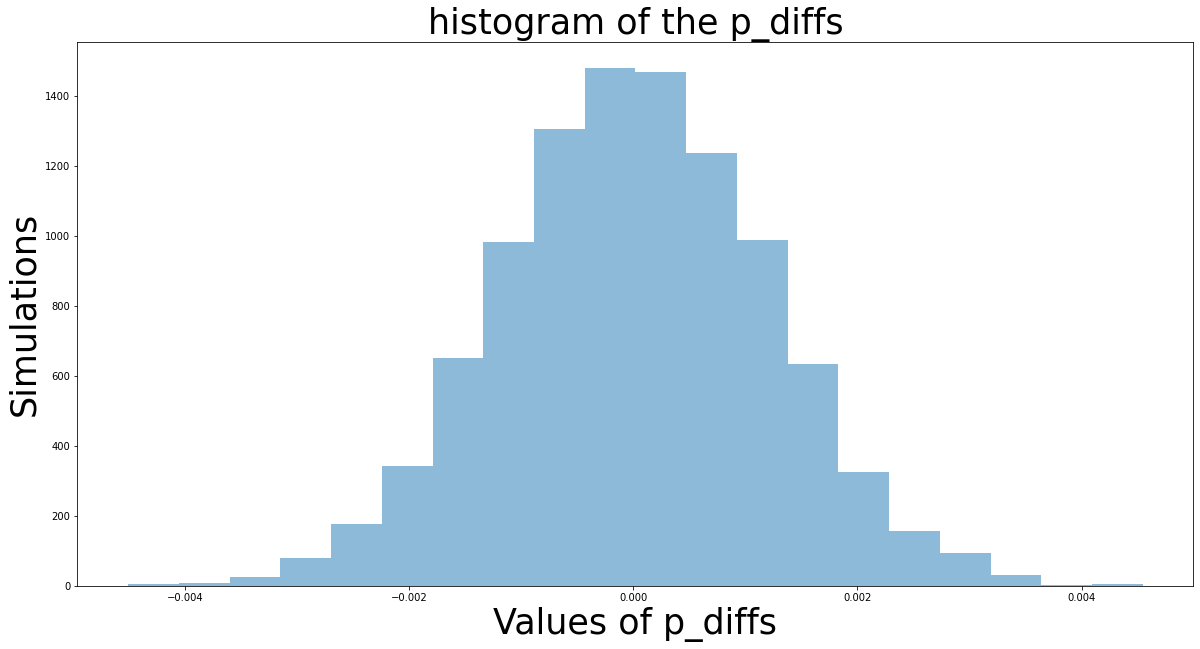

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(20,10))
plt.hist(p_diffs, alpha = 0.5,bins=20);
plt.title("histogram of the p_diffs",fontsize=35)
plt.xlabel("Values of p_diffs",fontsize=35)
plt.ylabel("Simulations",fontsize=35)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [38]:
# Calculating the actual difference observed in df2
observed_diffs = df2.query('group=="treatment"').converted.mean() - df2.query('group=="control"').converted.mean()
observed_diffs

-0.0015790565976871451

In [39]:
(p_diffs > observed_diffs).mean()

0.9098

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**This is the p_value, it indicates whether to reject the Null hypothesis, it also determines the error Type.**

**When it is bellow 0.5, the Null hypothesis is accepted, in this case it is ~0.9 hence the Null hypothesis is rejected.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [40]:
import statsmodels.api as sm
# find the conversions per page
convert_old = sum((df2.group=='control')&(df2.converted==1))
convert_new = sum((df2.group=='treatment')&(df2.converted==1))
# find the number of samples that received each page
number_old = df2.query('group == "control"').shape[0]
number_new = df2.query('group == "treatment"').shape[0]

In [41]:
# or we can use the implementation from statsmodels
# where we pass in the success (they call the argument counts)
# and the total number for each group (they call the argument nobs,
# number of observations)
counts = [convert_new, convert_old]
nobs = [number_new, number_old]
z_score, p_value = sm.stats.proportions_ztest(counts, nobs, alternative = 'larger') 
z_score, p_value

(-1.3116075339133115, 0.905173705140591)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [42]:
zscore, pvalue = sm.stats.proportions_ztest(counts, nobs, alternative = 'two-sided')
print('zscore = {:.3f}, pvalue = {:.3f}'.format(zscore, pvalue))

zscore = -1.312, pvalue = 0.190


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The  zscore = -1.312,while the pvalue = 0.190 which does not agree with the findings in parts j. and k.** This indicates that the old and new pages have no effect to the conversion rate. 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [43]:
#loading df and preview the top
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [44]:
#creating a copy of df2
df2=df.copy()

In [45]:
#group	landing_page
df2[['control','treatment']]=pd.get_dummies(df2['group'])
df2[['new_page','old_page']]=pd.get_dummies(df2['landing_page'])
df2=df2.drop('group',axis=1)
df2=df2.drop('landing_page',axis=1)
df2=df2.drop('treatment',axis=1)
df2=df2.drop('old_page',axis=1)

In [46]:
# preview the top of df2
df2.head()

,user_id,timestamp,converted,control,new_page
0,851104,2017-01-21 22:11:48.556739,0,1,0
1,804228,2017-01-12 08:01:45.159739,0,1,0
2,661590,2017-01-11 16:55:06.154213,0,0,1
3,853541,2017-01-08 18:28:03.143765,0,0,1
4,864975,2017-01-21 01:52:26.210827,1,1,0


In [47]:
#reanming columns control to ab_page and landing to new_page 
df2['ab_page']=df2['control']
df2['landing_page']=df2['new_page']

In [48]:
#dropping columns that are not needed after feature engineering
df2=df2.drop('control',axis=1)
df2=df2.drop('new_page',axis=1)

In [49]:
#preview top of df2
df2.head()

,user_id,timestamp,converted,ab_page,landing_page
0,851104,2017-01-21 22:11:48.556739,0,1,0
1,804228,2017-01-12 08:01:45.159739,0,1,0
2,661590,2017-01-11 16:55:06.154213,0,0,1
3,853541,2017-01-08 18:28:03.143765,0,0,1
4,864975,2017-01-21 01:52:26.210827,1,1,0


In [50]:
#loop to change date columns to date type
time_cols = ['timestamp']
for i in range(1):
    new =pd.to_datetime(df2[time_cols[i]],format='%Y-%m-%d %H:%M:%S').dt.tz_localize(None)
    df2[time_cols[i]] = new
df2.head()

,user_id,timestamp,converted,ab_page,landing_page
0,851104,2017-01-21 22:11:48.556739,0,1,0
1,804228,2017-01-12 08:01:45.159739,0,1,0
2,661590,2017-01-11 16:55:06.154213,0,0,1
3,853541,2017-01-08 18:28:03.143765,0,0,1
4,864975,2017-01-21 01:52:26.210827,1,1,0


In [51]:
#extracting the day,month and year into columns
#This is to enable analysis per day,week,month and year
df2['day'] = df2['timestamp'].dt.day
df2['week'] = df2['timestamp'].dt.week
df2['month'] = df2['timestamp'].dt.month
df2['year'] = df2['timestamp'].dt.year
df2['hour'] = df2['timestamp'].dt.hour
df2['minute'] = df2['timestamp'].dt.minute
df2

,user_id,timestamp,converted,ab_page,landing_page,day,week,month,year,hour,minute
0,851104,2017-01-21 22:11:48.556739,0,1,0,21,3,1,2017,22,11
1,804228,2017-01-12 08:01:45.159739,0,1,0,12,2,1,2017,8,1
2,661590,2017-01-11 16:55:06.154213,0,0,1,11,2,1,2017,16,55
3,853541,2017-01-08 18:28:03.143765,0,0,1,8,1,1,2017,18,28
4,864975,2017-01-21 01:52:26.210827,1,1,0,21,3,1,2017,1,52
...,...,...,...,...,...,...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,0,1,0,3,1,1,2017,22,28
294474,945152,2017-01-12 00:51:57.078372,0,1,0,12,2,1,2017,0,51
294475,734608,2017-01-22 11:45:03.439544,0,1,0,22,3,1,2017,11,45
294476,697314,2017-01-15 01:20:28.957438,0,1,0,15,2,1,2017,1,20


In [52]:
#dropping columns that are not needed after feature engineering
df2=df2.drop(['user_id','timestamp'],axis=1)
df2

,converted,ab_page,landing_page,day,week,month,year,hour,minute
0,0,1,0,21,3,1,2017,22,11
1,0,1,0,12,2,1,2017,8,1
2,0,0,1,11,2,1,2017,16,55
3,0,0,1,8,1,1,2017,18,28
4,1,1,0,21,3,1,2017,1,52
...,...,...,...,...,...,...,...,...,...
294473,0,1,0,3,1,1,2017,22,28
294474,0,1,0,12,2,1,2017,0,51
294475,0,1,0,22,3,1,2017,11,45
294476,0,1,0,15,2,1,2017,1,20


In [53]:
df2.columns

Index(['converted', 'ab_page', 'landing_page', 'day', 'week', 'month', 'year',
       'hour', 'minute'],
      dtype='object')

In [54]:

# manually add the intercept
# Adding an intercept column
df2['intercept'] = 1.0  # so we don't need to use sm.add_constant every time

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [55]:
import statsmodels as sm
import statsmodels.regression.linear_model as sm
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
# Instantiating the regression model
logit_mod = sm.Logit(df2['converted'], df2[['ab_page','intercept']])
# Fitting the model
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366243
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [56]:
#get model summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               294478
Model:                          Logit   Df Residuals:                   294476
Method:                           MLE   Df Model:                            1
Date:                Thu, 25 Jun 2020   Pseudo R-squ.:               7.093e-06
Time:                        06:20:16   Log-Likelihood:            -1.0785e+05
converged:                       True   LL-Null:                   -1.0785e+05
Covariance Type:            nonrobust   LLR p-value:                    0.2161
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ab_page        0.0140      0.011      1.237      0.216      -0.008       0.036
intercept     -2.0027      0.008   -248.781      0.000      -2.018      -1.987
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

 p-value associated with ab_page=0.682
 >
The null and alternative hypotheses associated with your regression model
$$H_0: \beta_{1} = 0$$$$H_1: \beta_{1} \neq 0$$

p-value associated with ab_page=0.682, it differs because the model performs a 2-sided Test,In this case it indicates that there is no relation between a user seeing either page(old/new) and the conversion .This because it is more than the recomended value of p_value(0.05). As  a result the experiment has a Type I error and the Null hypothesis is rejected.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**It is a good practice as a Data analyst to be inquistive in suspect all the available variables that influences a given result**
>
**The only disadvantages of adding additional terms is the human effort in terms of feature engineering and increased computational cost**


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [57]:
#create the dataset and preview the top
df_new=pd.read_csv('countries.csv')
df_new.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [58]:
#get unique values
df_new['country'].nunique()

3

In [59]:
### Create the necessary dummy variables
df_new[['CA','US','UK']]=pd.get_dummies(df_new['country'])
df_new

,user_id,country,CA,US,UK
0,834778,UK,0,1,0
1,928468,US,0,0,1
2,822059,UK,0,1,0
3,711597,UK,0,1,0
4,710616,UK,0,1,0
...,...,...,...,...,...
290579,653118,US,0,0,1
290580,878226,UK,0,1,0
290581,799368,UK,0,1,0
290582,655535,CA,1,0,0


In [60]:
#concatenating the columns
df2 = pd.concat([df2,df_new],axis=1)
#previewing the head
df2.head()

,converted,ab_page,landing_page,day,week,month,year,hour,minute,intercept,user_id,country,CA,US,UK
0,0,1,0,21,3,1,2017,22,11,1.0,834778.0,UK,0.0,1.0,0.0
1,0,1,0,12,2,1,2017,8,1,1.0,928468.0,US,0.0,0.0,1.0
2,0,0,1,11,2,1,2017,16,55,1.0,822059.0,UK,0.0,1.0,0.0
3,0,0,1,8,1,1,2017,18,28,1.0,711597.0,UK,0.0,1.0,0.0
4,1,1,0,21,3,1,2017,1,52,1.0,710616.0,UK,0.0,1.0,0.0


In [61]:
#checking missing values after concatenation
df2.isna().any().sum()

5

In [62]:
#dropping missing values after concatenation
df2.dropna(inplace=True)

In [63]:
#confirming missing values after concatenation
df2.isna().any().sum()

0

In [64]:
df2['intercept'] = 1.0  # so we don't need to use sm.add_constant every time

In [65]:
# Instantiating the regression model
logit2 = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'UK', 'CA','US']])

In [66]:
result2 = logit2.fit()

         Current function value: 0.366280
         Iterations: 35


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [67]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 25 Jun 2020   Pseudo R-squ.:               1.591e-05
Time:                        06:20:20   Log-Likelihood:            -1.0644e+05
converged:                      False   LL-Null:                   -1.0644e+05
Covariance Type:            nonrobust   LLR p-value:                    0.3358
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.5082   1.52e+05  -9.93e-06      1.000   -2.98e+05    2.98e+05
ab_page        0.0151      0.011      1.320      0.187      -0.007       0.037
UK            -0.4949   1.52e+05  -3.26e-06      1.000   -2.98e+05    2.98e+05
CA            -0.5247   1.52e+05  -3.45e-06      1.000   -2.98e+05    2.98e+05
US            -0.4887   1.52e+05  -3.22e-06      1.000   -2.98e+05    2.98e+05
==============================================================================
"""

From the results,

ab_page  p_value(0.187)	

UK       p_value(1.000)	

CA		   p_value(1.000)	

US	     p_value(1.000)	

The recommended value is 0.05 therefore the variable interactions have no statistical significance


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [68]:
# manually add the intercept
# Adding an intercept column
df2['intercept'] = 1.0  # so we don't need to use sm.add_constant every time

In [69]:
import statsmodels as sm
import statsmodels.regression.linear_model as sm
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

Optimization terminated successfully.
         Current function value: 0.861230
         Iterations 3


In [80]:
df2['UK_ab_page'] = df2['UK']*df2['ab_page']
df2['CA_ab_page'] = df2['CA']*df2['ab_page']
df2['US_ab_page'] = df2['US']*df2['ab_page']
# Instantiating the regression model
logit3 = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'UK','US', 'CA', 'UK_ab_page', 'CA_ab_page']])

In [81]:
# Fitting the model
results3 = logit3.fit()

Optimization terminated successfully.
         Current function value: 0.366275
         Iterations 8


In [82]:
#summary results
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Thu, 25 Jun 2020   Pseudo R-squ.:               2.986e-05
Time:                        07:28:34   Log-Likelihood:            -1.0643e+05
converged:                       True   LL-Null:                   -1.0644e+05
Covariance Type:            nonrobust   LLR p-value:                    0.2731
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.4982   1.24e+05   -1.2e-05      1.000   -2.44e+05    2.44e+05
ab_page        0.0106      0.023      0.466      0.641      -0.034       0.055
UK            -0.5086   1.24e+05  -4.09e-06      1.000   -2.44e+05    2.44e+05
US            -0.4964   1.24e+05  -3.99e-06      1.000   -2.44e+05    2.44e+05
CA            -0.4932   1.24e+05  -3.96e-06      1.000   -2.44e+05    2.44e+05
UK_ab_page     0.0119      0.027      0.447      0.655      -0.040       0.064
CA_ab_page    -0.0796      0.057     -1.406      0.160      -0.191       0.031
==============================================================================
"""

The summary results shows all the p_values associated with the Countries as 
 
ab_page	      0.641	

UK	          1.000	

US	          1.000

CA	          1.000	

UK_ab_page	  0.655	

CA_ab_page	  0.160	

Similarly this indicates that they all have no statistical significance. The country of origin has no effect on the conversion of the user.


# Conclusion

#probabilities

The experiment was carried out on a population of  290584 users, 35237 converted. 
Probability of an individual converting regardless of the page they receive was 0.11959667567149027, the probability of  an individual in the control group converting was 0.1203863045004612, probabilityan of an individual in the treatment group converted was 0.11880724790277405
Probability that an individual received the new page or old page  was 50% for all the sample population.
The convert rate for the new page was 11.96% whereby  all the participants had an equal chance of 50%  of getting either the old or new page.

#Regression analysis

The null and alternative hypotheses associated with your regression model

H0:β1=0 

H1:β1≠0 

p-values associated with all the variables were greater than 0.05 which is the recommended value, This differerd because the regression model performs a 2-sided Test, This was an indication that there is no relation between a user seeing either page(old/new) and the conversion .As a result the experiment has a Type I error and the Null hypothesis is rejected.


The test failed to reject the null hypothesis,The ecommerce company is therefore not adviced to change the page.There is no relation between then type of page and the conversion rate.
